In [1]:
import dill
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from numpy import unique

In [2]:
# set figure size globally
sns.set(rc={'figure.figsize':(15,12)})
sns.set_style('whitegrid')

## Load dataframes for plots

In [3]:
# reload dsfs
with open('repeat_metrics_df' + '_uci_' +  '5m10r' + '.pkl', 'rb') as in_strm:
    repeat_metrics_df = dill.load(in_strm)

with open("mean_metrics_df" + '_uci_' + '5m10r' +  '.pkl', 'rb') as in_strm:
    mean_metrics_df = dill.load(in_strm)

with open('repeat_epoch_accuracies_train_df' + '_uci_' +  '5m10r' + '.pkl', 'rb') as in_strm:
    repeat_epoch_accuracies_train_df = dill.load(in_strm)

with open('repeat_epoch_accuracies_test_df' + '_uci_' + '5m10r' +  '.pkl', 'rb') as in_strm:
    repeat_epoch_accuracies_test_df = dill.load(in_strm)

with open('repeat_epoch_accuracies_df' + '_uci_' + '5m10r' +  '.pkl', 'rb') as in_strm:
    repeat_epoch_accuracies_df = dill.load(in_strm)

## Perform t-tests

In [4]:
# make list of all different models
model_plain_list = repeat_metrics_df.model_plain.unique()

In [5]:
# Make a function to iterate throguh models, performoing t tests on each
def welch_t_test_loop(metric='test_accuracy', df=repeat_metrics_df):
    
    # Get names of models
    model_plain_list = df.model_plain.unique()
    
    # make dict to store metric for each iteration of each model
    model_plain_dict = {}
    
    # add model metrics to the list
    for model in model_plain_list:
            model_plain_dict[str(model)] = np.array(df[df['model_plain']==model][metric])         

    # get keys and values
    model_plain_dict_keys = list(model_plain_dict.keys())
    model_plain_dict_values = list(model_plain_dict.values())
    
  
    
    t_test_dict = {}
    
    # loop thriough ro get t test reusults
    for i in range(len(model_plain_dict_keys)):
        for j in range(len(model_plain_dict_values)):
            t_test_result = ttest_ind(model_plain_dict_values[i], model_plain_dict_values[j], equal_var=False)
            t_test_dict[model_plain_dict_keys[i] + "_vs_" + model_plain_dict_keys[j]] = t_test_result
            
    return t_test_dict

In [6]:
# get p values for test accuracy
acc_p_values = welch_t_test_loop()
acc_p_values

{'lstm_standard_original_vs_lstm_standard_original': Ttest_indResult(statistic=0.0, pvalue=1.0),
 'lstm_standard_original_vs_cnnlstm_standard_original': Ttest_indResult(statistic=5.774410990697567, pvalue=2.510596349669002e-05),
 'lstm_standard_original_vs_convlstm_standard_original': Ttest_indResult(statistic=6.944331590715038, pvalue=2.4233513759529543e-06),
 'lstm_standard_original_vs_bilstm_standard_original': Ttest_indResult(statistic=1.0805520848954029, pvalue=0.2948029134100201),
 'lstm_standard_original_vs_lstm_standard_reduced': Ttest_indResult(statistic=2.8468135916047768, pvalue=0.017514938481934954),
 'lstm_standard_original_vs_cnnlstm_standard_reduced': Ttest_indResult(statistic=13.692636052092945, pvalue=6.388240907481822e-11),
 'lstm_standard_original_vs_convlstm_standard_reduced': Ttest_indResult(statistic=17.19782957395678, pvalue=1.2917065769207976e-12),
 'lstm_standard_original_vs_bilstm_standard_reduced': Ttest_indResult(statistic=4.6855850100481735, pvalue=0.000628

In [7]:
# get p values for test accuracy
f1_p_values = welch_t_test_loop(metric='f1_score')
f1_p_values

{'lstm_standard_original_vs_lstm_standard_original': Ttest_indResult(statistic=0.0, pvalue=1.0),
 'lstm_standard_original_vs_cnnlstm_standard_original': Ttest_indResult(statistic=5.731666587017998, pvalue=2.828061340862614e-05),
 'lstm_standard_original_vs_convlstm_standard_original': Ttest_indResult(statistic=6.982406305720214, pvalue=2.3606456226383393e-06),
 'lstm_standard_original_vs_bilstm_standard_original': Ttest_indResult(statistic=1.1345291164092535, pvalue=0.27218172604085317),
 'lstm_standard_original_vs_lstm_standard_reduced': Ttest_indResult(statistic=2.675842885376612, pvalue=0.023804966138529962),
 'lstm_standard_original_vs_cnnlstm_standard_reduced': Ttest_indResult(statistic=13.78496590412741, pvalue=5.4942970098711826e-11),
 'lstm_standard_original_vs_convlstm_standard_reduced': Ttest_indResult(statistic=17.11249211506167, pvalue=1.4149456479245552e-12),
 'lstm_standard_original_vs_bilstm_standard_reduced': Ttest_indResult(statistic=4.764032241616235, pvalue=0.0005615

In [8]:
# make function to return t-test result for a pair of models
def t_test_pair(p_values_dict, model1, model2):
    return p_values_dict[model1 + '_vs_' + model2]

In [9]:
# make function to return t-test result for one model vs the rest
def t_test_pair_all(p_values_dict, model, data):
    
    models_selected= list()
    
    # select either original or feature reduced dataset
    if(data == 'original'):
        for model_plain in model_plain_list:
            if (model_plain.find("original") != -1):
                models_selected.append(model_plain)
    if(data == 'reduced'):
        for model_plain in model_plain_list:
            if (model_plain.find("reduced") != -1):
                models_selected.append(model_plain)
    
    for models in models_selected:
        print('\n', models)
        print(p_values_dict[model + '_vs_' + models])

In [10]:
# Make a function to iterate throguh models, performoing t tests on each, then make a df showing results
def welch_t_test_loop_df(metric='test_accuracy', df=repeat_metrics_df):
    
    # Get names of models
    model_plain_list = df.model_plain.unique()
    
    # make dict to store metric for each iteration of each model
    model_plain_dict = {}
    
    # add model metrics to the list
    for model in model_plain_list:
            model_plain_dict[str(model)] = np.array(df[df['model_plain']==model][metric])         

    # get keys and values
    model_plain_dict_keys = list(model_plain_dict.keys())
    model_plain_dict_values = list(model_plain_dict.values())          

    # make df to store t test results
    t_test_df = pd.DataFrame(index=model_plain_dict_keys, columns=model_plain_dict_keys)
    
    for i in range(len(model_plain_dict_keys)):
        t_test_result_list = list()
        for j in range(len(model_plain_dict_values)):
            t_test_result_list.append(ttest_ind(model_plain_dict_values[i], model_plain_dict_values[j], equal_var=False).pvalue)
            t_test_df[model_plain_dict_keys[i]][j] = t_test_result_list[j]
            
    return t_test_df

In [11]:
# get df of p valkues
acc_p_values_df = welch_t_test_loop_df()

acc_p_values_df

,lstm_standard_original,cnnlstm_standard_original,convlstm_standard_original,bilstm_standard_original,lstm_standard_reduced,cnnlstm_standard_reduced,convlstm_standard_reduced,bilstm_standard_reduced,lstm_divide_and_conquer_original,cnnlstm_divide_and_conquer_original,convlstm_divide_and_conquer_original,bilstm_divide_and_conquer_original,lstm_divide_and_conquer_reduced,cnnlstm_divide_and_conquer_reduced,convlstm_divide_and_conquer_reduced,bilstm_divide_and_conquer_reduced
lstm_standard_original,1.0,0.000025,0.000002,0.294803,0.017515,0.0,0.0,0.000628,0.251144,0.000098,0.00011,0.040644,0.019413,0.000936,0.000503,0.009051
cnnlstm_standard_original,0.000025,1.0,0.147446,0.001932,0.224756,0.0,0.0,0.040303,0.329378,0.648181,0.871638,0.876469,0.687757,0.117625,0.734229,0.738253
convlstm_standard_original,0.000002,0.147446,1.0,0.000222,0.369826,0.0,0.0,0.103396,0.156334,0.082605,0.16845,0.741564,0.282595,0.007971,0.162323,0.767277
bilstm_standard_original,0.294803,0.001932,0.000222,1.0,0.034051,0.0,0.0,0.001694,0.520342,0.00512,0.004313,0.104438,0.085668,0.032669,0.010401,0.0349
lstm_standard_reduced,0.017515,0.224756,0.369826,0.034051,1.0,0.153363,0.037308,0.861752,0.112119,0.190478,0.213756,0.340553,0.192225,0.119994,0.19798,0.337867
cnnlstm_standard_reduced,0.0,0.0,0.0,0.0,0.153363,1.0,0.0154,0.063826,0.000395,0.0,0.0,0.003164,0.000049,0.0,0.0,0.000504
convlstm_standard_reduced,0.0,0.0,0.0,0.0,0.037308,0.0154,1.0,0.005983,0.000069,0.0,0.0,0.000455,0.000004,0.0,0.0,0.000044
bilstm_standard_reduced,0.000628,0.040303,0.103396,0.001694,0.861752,0.063826,0.005983,1.0,0.02669,0.030178,0.037748,0.15262,0.041998,0.013391,0.033861,0.123146
lstm_divide_and_conquer_original,0.251144,0.329378,0.156334,0.520342,0.112119,0.000395,0.000069,0.02669,1.0,0.415143,0.367857,0.40445,0.542936,0.680137,0.421253,0.307057
cnnlstm_divide_and_conquer_original,0.000098,0.648181,0.082605,0.00512,0.190478,0.0,0.0,0.030178,0.415143,1.0,0.808856,0.755461,0.866165,0.287609,0.978506,0.59581


In [12]:
f1_p_values_df = welch_t_test_loop_df('f1_score').astype(float).round(3)

f1_p_values_df.astype(float).round(3)

,lstm_standard_original,cnnlstm_standard_original,convlstm_standard_original,bilstm_standard_original,lstm_standard_reduced,cnnlstm_standard_reduced,convlstm_standard_reduced,bilstm_standard_reduced,lstm_divide_and_conquer_original,cnnlstm_divide_and_conquer_original,convlstm_divide_and_conquer_original,bilstm_divide_and_conquer_original,lstm_divide_and_conquer_reduced,cnnlstm_divide_and_conquer_reduced,convlstm_divide_and_conquer_reduced,bilstm_divide_and_conquer_reduced
lstm_standard_original,1.000,0.000,0.000,0.272,0.024,0.000,0.000,0.001,0.261,0.000,0.000,0.045,0.021,0.001,0.001,0.009
cnnlstm_standard_original,0.000,1.000,0.122,0.003,0.224,0.000,0.000,0.031,0.466,0.463,0.828,0.884,0.703,0.070,0.686,0.739
convlstm_standard_original,0.000,0.122,1.000,0.000,0.359,0.000,0.000,0.084,0.247,0.036,0.134,0.718,0.277,0.003,0.128,0.736
bilstm_standard_original,0.272,0.003,0.000,1.000,0.044,0.000,0.000,0.002,0.512,0.009,0.006,0.120,0.098,0.055,0.015,0.039
lstm_standard_reduced,0.024,0.224,0.359,0.044,1.000,0.238,0.074,0.895,0.147,0.177,0.210,0.320,0.195,0.118,0.194,0.319
cnnlstm_standard_reduced,0.000,0.000,0.000,0.000,0.238,1.000,0.017,0.090,0.001,0.000,0.000,0.003,0.000,0.000,0.000,0.000
convlstm_standard_reduced,0.000,0.000,0.000,0.000,0.074,0.017,1.000,0.010,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000
bilstm_standard_reduced,0.001,0.031,0.084,0.002,0.895,0.090,0.010,1.000,0.040,0.020,0.028,0.126,0.034,0.009,0.025,0.097
lstm_divide_and_conquer_original,0.261,0.466,0.247,0.512,0.147,0.001,0.000,0.040,1.000,0.607,0.516,0.506,0.660,0.872,0.574,0.412
cnnlstm_divide_and_conquer_original,0.000,0.463,0.036,0.009,0.177,0.000,0.000,0.020,0.607,1.000,0.679,0.700,0.976,0.271,0.873,0.521


## Stage 1: Original data

### Mean final model accuracies etc

In [13]:
# make a function to display mean accuracies (%) and sd
def display_accuracies(data):
    df = mean_metrics_df[['mean_test_accuracy', 'test_accuracy_sd']][mean_metrics_df['data_used'] == data].round(4)*100
    df['model'] = mean_metrics_df['model_plain']
    return df

In [14]:
# make a function to display mean f1 scores and sd
def display_f1(data):
    df = mean_metrics_df[['mean_f1_score', 'f1_score_sd']][mean_metrics_df['data_used'] == data].round(4)
    df['model'] = mean_metrics_df['model_plain']
    return df

In [15]:
display_accuracies('original')

,mean_test_accuracy,test_accuracy_sd,model
lstm_original,91.46,0.75,lstm_standard_original
cnnlstm_original,89.67,0.55,cnnlstm_standard_original
convlstm_original,89.27,0.58,convlstm_standard_original
bilstm_original,91.03,0.93,bilstm_standard_original
lstm_original_dac,90.48,2.31,lstm_divide_and_conquer_original
cnnlstm_original_dac,89.80,0.65,cnnlstm_divide_and_conquer_original
convlstm_original_dac,89.72,0.75,convlstm_divide_and_conquer_original
bilstm_original_dac,89.54,2.36,bilstm_divide_and_conquer_original


In [16]:
display_f1('original')

,mean_f1_score,f1_score_sd,model
lstm_original,0.9143,0.0075,lstm_standard_original
cnnlstm_original,0.8965,0.0054,cnnlstm_standard_original
convlstm_original,0.8922,0.0057,convlstm_standard_original
bilstm_original,0.9097,0.0094,bilstm_standard_original
lstm_original_dac,0.9034,0.0265,lstm_divide_and_conquer_original
cnnlstm_original_dac,0.8986,0.0060,cnnlstm_divide_and_conquer_original
convlstm_original_dac,0.8972,0.0075,convlstm_divide_and_conquer_original
bilstm_original_dac,0.8953,0.0240,bilstm_divide_and_conquer_original


### Perform t-tests to see if significant

In [17]:
# function to sort by f1 score
def sort_f1(df):
    return df.sort_values('mean_f1_score', ascending=False)

In [18]:
sort_f1(display_f1('original'))

,mean_f1_score,f1_score_sd,model
lstm_original,0.9143,0.0075,lstm_standard_original
bilstm_original,0.9097,0.0094,bilstm_standard_original
lstm_original_dac,0.9034,0.0265,lstm_divide_and_conquer_original
cnnlstm_original_dac,0.8986,0.0060,cnnlstm_divide_and_conquer_original
convlstm_original_dac,0.8972,0.0075,convlstm_divide_and_conquer_original
cnnlstm_original,0.8965,0.0054,cnnlstm_standard_original
bilstm_original_dac,0.8953,0.0240,bilstm_divide_and_conquer_original
convlstm_original,0.8922,0.0057,convlstm_standard_original


In [19]:
t_test_pair_all(f1_p_values, 'lstm_standard_original', 'original')


 lstm_standard_original
Ttest_indResult(statistic=0.0, pvalue=1.0)

 cnnlstm_standard_original
Ttest_indResult(statistic=5.731666587017998, pvalue=2.828061340862614e-05)

 convlstm_standard_original
Ttest_indResult(statistic=6.982406305720214, pvalue=2.3606456226383393e-06)

 bilstm_standard_original
Ttest_indResult(statistic=1.1345291164092535, pvalue=0.27218172604085317)

 lstm_divide_and_conquer_original
Ttest_indResult(statistic=1.1890339224539306, pvalue=0.26074696117550156)

 cnnlstm_divide_and_conquer_original
Ttest_indResult(statistic=4.879451475042001, pvalue=0.00013671727203835962)

 convlstm_divide_and_conquer_original
Ttest_indResult(statistic=4.813316358823113, pvalue=0.00013929450424241056)

 bilstm_divide_and_conquer_original
Ttest_indResult(statistic=2.2674861306934972, pvalue=0.04499879493877603)


### Plots

Plot standard model mean accuracies over time

In [20]:
# function tomake list to store model type (whether dac or standard model)
def model_type_fn(df, model="model_plain"):

    model_type = list()
    for i in range(len(df)):
        if (df[model][i].find("standard") == -1):
            model_type.append("divide_and_conquer")
        else:
            model_type.append("standard") 
            
    return model_type

In [21]:
# function to make list to store model family
def model_family_fn(df):
    family = list()
    for i in range(len(df)):
        if (df['model_plain'][i][0] == "l"):
            family.append("lstm")
        elif (df['model_plain'][i][0] == "c"):
            if (df['model_plain'][i][1] == "n"):
                family.append("cnnlstm")
            else:
                family.append("convlstm")
        else:
            family.append("bilstm")
    
    return family

In [22]:
# make function to get the mean accuracy/training times of epochs for the data, depending on what is selected, and plot it
def plot_mean_and_sd(col, condition, types=None, title=None, labels='default', df=repeat_epoch_accuracies_test_df):
    
    # make df of mean accuracy and time per epoch
    test_mean_accuracies_times = df[df[col]==condition].groupby(['model_plain','epoch']).mean()
    test_mean_accuracies_times.reset_index(inplace=True)  
    
    # make column to show whether dac or standard
    test_mean_accuracies_times['model_type'] = model_type_fn(test_mean_accuracies_times)
    
    # add column to show model family
    test_mean_accuracies_times['family'] = model_family_fn(test_mean_accuracies_times)
    # get sd
    sd = df[df[col]==condition].groupby(['model_plain','epoch']).std()
    sd_acc = list(sd.accuracy)
    test_mean_accuracies_times['sd_acc'] = sd_acc

    #get lower and upper bounds of sd
    test_mean_accuracies_times['acc_lower'] = test_mean_accuracies_times['accuracy'] - test_mean_accuracies_times['sd_acc']
    test_mean_accuracies_times['acc_upper'] = test_mean_accuracies_times['accuracy'] + test_mean_accuracies_times['sd_acc']

    # get min and max also
    mins = df[df[col]==condition].groupby(['model_plain','epoch']).min()
    maxes = df[df[col]==condition].groupby(['model_plain','epoch']).max()

    # convert the times to a list for the df
    min_acc = list(mins.accuracy)
    max_acc = list(maxes.accuracy)

    test_mean_accuracies_times['min_acc'] = min_acc
    test_mean_accuracies_times['max_acc'] = max_acc

    # get names of the models to be plotted
    models_list=unique(test_mean_accuracies_times['model_plain'])
    
    # if no labels inputted, set the legend labels to default 
    if (labels=='default'):
        labels=models_list

        
    # plot the lines for each model    
    ax = sns.lineplot(x = 'time', 
              y = 'accuracy', 
              data=test_mean_accuracies_times,
              style='model_type',
              hue='family',
              ci='sd',
            )
    
    # add legend. user can set custom labels for aesthetics
    ax.legend(loc = 'lower right',
             labels=labels,
             prop={'size': 16})
    
    # limit for consistency
    ax.set(ylim=(0, 1),
          xlim=(0, None))
    
    ax.set(title=title,
       xlabel='Time (s)',
       ylabel='Accuracy')
    
    # add sd bars, if only comparing 1 type of model
    if types == "one":
        # iterate through, adding sd bars for each moddel selected by condition
        for i in range(len(models_list)):
            ax.fill_between('time',
                  'acc_lower', 
                  'acc_upper',
                  data=test_mean_accuracies_times[test_mean_accuracies_times['model_plain']==models_list[i]],
                  alpha=0.1)
            
#     # add min/max bars, if only comparing 1 type of model
#     if types == "one":
#         # iterate through, adding sd bars for each moddel selected by condition
#         for i in range(len(models_list)):
#             ax.fill_between('time',
#                   'min_acc', 
#                   'max_acc',
#                   data=test_mean_accuracies_times[test_mean_accuracies_times['model_plain']==models_list[i]],
#                   alpha=0.1)


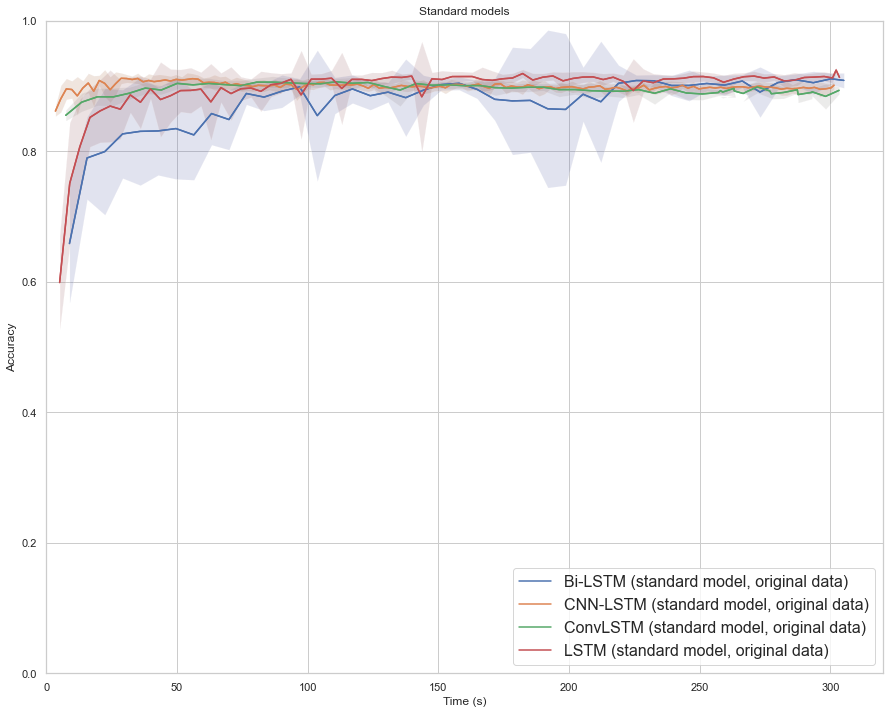

In [23]:
# plot just standard, non-dac models which were trrained on the original data
plot_mean_and_sd('data_used_and_model_type', 'original_standard', types='one')

# Now make with better labels
labels = ['Bi-LSTM (standard model, original data)', 'CNN-LSTM (standard model, original data)', 'ConvLSTM (standard model, original data)', 'LSTM (standard model, original data)']
plot_mean_and_sd('data_used_and_model_type', 'original_standard', types='one', title="Standard models", labels=labels)

Plot divide and conquer model mean accuracies over time

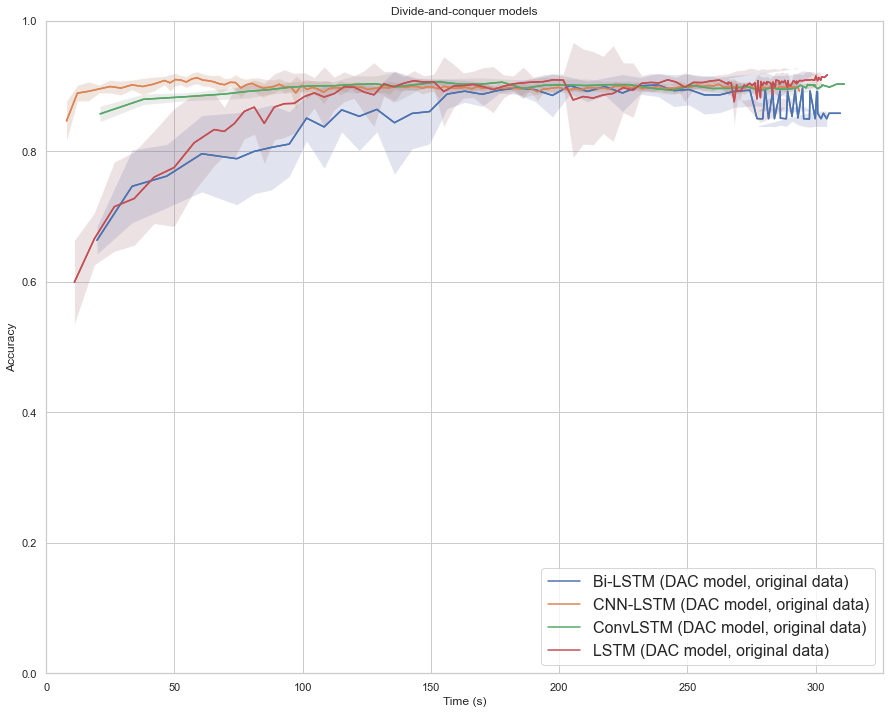

In [24]:
# plot just dac models which were trrained on the original data
plot_mean_and_sd('data_used_and_model_type', 'original_divide_and_conquer', types='one')

# Now make with better labels
labels = ['Bi-LSTM (DAC model, original data)', 'CNN-LSTM (DAC model, original data)', 'ConvLSTM (DAC model, original data)', 'LSTM (DAC model, original data)']
plot_mean_and_sd('data_used_and_model_type', 'original_divide_and_conquer', types='one', title="Divide-and-conquer models", labels=labels)

## Stage 2: Dataset after feature selection

### Mean final model accuracies etc

In [25]:
display_accuracies('reduced')

,mean_test_accuracy,test_accuracy_sd,model
lstm_reduced,88.20,3.36,lstm_standard_reduced
cnnlstm_reduced,86.42,0.81,cnnlstm_standard_reduced
convlstm_reduced,85.44,0.73,convlstm_standard_reduced
bilstm_reduced,87.96,2.11,bilstm_standard_reduced
lstm_reduced_dac,89.90,1.58,lstm_divide_and_conquer_reduced
cnnlstm_reduced_dac,90.14,0.66,cnnlstm_divide_and_conquer_reduced
convlstm_reduced_dac,89.79,0.90,convlstm_divide_and_conquer_reduced
bilstm_reduced_dac,89.46,1.79,bilstm_divide_and_conquer_reduced


In [26]:
display_f1('reduced')

,mean_f1_score,f1_score_sd,model
lstm_reduced,0.8800,0.0377,lstm_standard_reduced
cnnlstm_reduced,0.8639,0.0080,cnnlstm_standard_reduced
convlstm_reduced,0.8543,0.0073,convlstm_standard_reduced
bilstm_reduced,0.8781,0.0215,bilstm_standard_reduced
lstm_reduced_dac,0.8987,0.0161,lstm_divide_and_conquer_reduced
cnnlstm_reduced_dac,0.9019,0.0063,cnnlstm_divide_and_conquer_reduced
convlstm_reduced_dac,0.8980,0.0090,convlstm_divide_and_conquer_reduced
bilstm_reduced_dac,0.8944,0.0178,bilstm_divide_and_conquer_reduced


### Perform t-tests to see if significant

In [27]:
sort_f1(display_f1('reduced'))

,mean_f1_score,f1_score_sd,model
cnnlstm_reduced_dac,0.9019,0.0063,cnnlstm_divide_and_conquer_reduced
lstm_reduced_dac,0.8987,0.0161,lstm_divide_and_conquer_reduced
convlstm_reduced_dac,0.8980,0.0090,convlstm_divide_and_conquer_reduced
bilstm_reduced_dac,0.8944,0.0178,bilstm_divide_and_conquer_reduced
lstm_reduced,0.8800,0.0377,lstm_standard_reduced
bilstm_reduced,0.8781,0.0215,bilstm_standard_reduced
cnnlstm_reduced,0.8639,0.0080,cnnlstm_standard_reduced
convlstm_reduced,0.8543,0.0073,convlstm_standard_reduced


In [28]:
t_test_pair_all(f1_p_values, 'cnnlstm_divide_and_conquer_reduced', 'reduced')


 lstm_standard_reduced
Ttest_indResult(statistic=1.716832363258405, pvalue=0.11836397716085105)

 cnnlstm_standard_reduced
Ttest_indResult(statistic=11.226415527378116, pvalue=2.6439659345924437e-09)

 convlstm_standard_reduced
Ttest_indResult(statistic=14.771986261927795, pvalue=2.3526402103968136e-11)

 bilstm_standard_reduced
Ttest_indResult(statistic=3.184593930416475, pvalue=0.009159599493234067)

 lstm_divide_and_conquer_reduced
Ttest_indResult(statistic=0.5438183939011337, pvalue=0.5967825896648679)

 cnnlstm_divide_and_conquer_reduced
Ttest_indResult(statistic=0.0, pvalue=1.0)

 convlstm_divide_and_conquer_reduced
Ttest_indResult(statistic=1.0646873156109837, pvalue=0.30271967194113475)

 bilstm_divide_and_conquer_reduced
Ttest_indResult(statistic=1.1848795105944572, pvalue=0.2605793211677466)


### Plots

Plot standard model mean accuracies over time

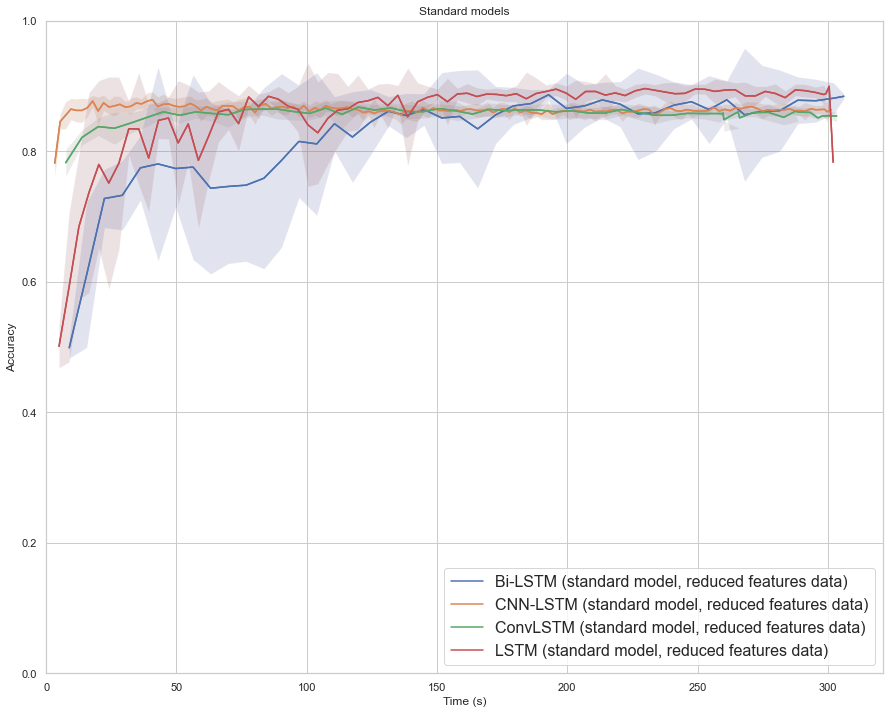

In [29]:
# plot just standard, non-dac models which were trrained on the fr data
plot_mean_and_sd('data_used_and_model_type', 'reduced_standard', types='one')

# Now make with better labels
labels = ['Bi-LSTM (standard model, reduced features data)', 'CNN-LSTM (standard model, reduced features data)', 'ConvLSTM (standard model, reduced features data)', 'LSTM (standard model, reduced features data)']
plot_mean_and_sd('data_used_and_model_type', 'reduced_standard', types='one', title="Standard models", labels=labels)

Plot divide and conquer model mean accuracies over time

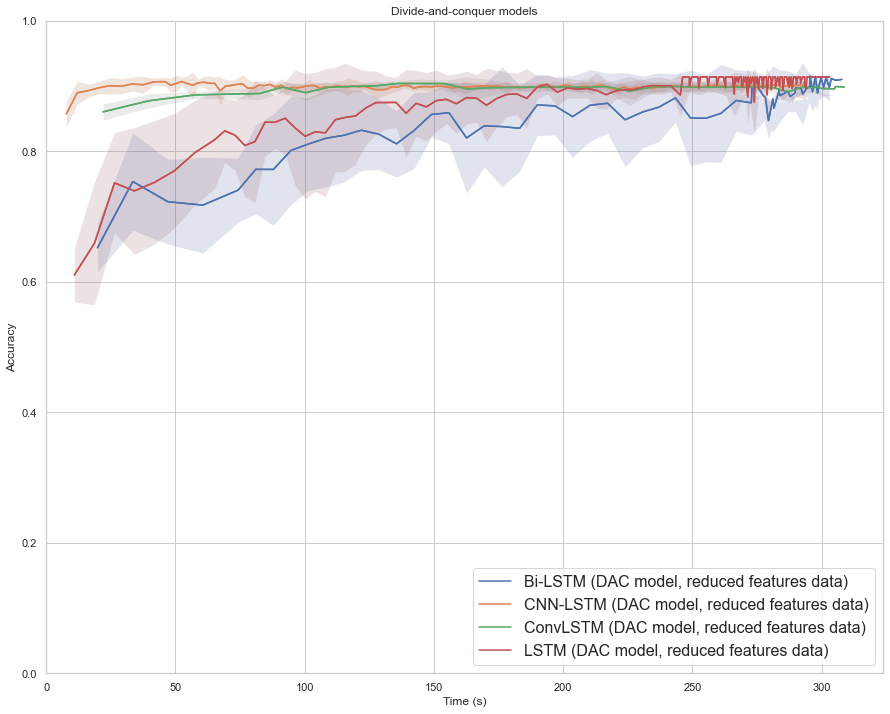

In [30]:
# plot just dac models which were trrained on the fr data
plot_mean_and_sd('data_used_and_model_type', 'reduced_divide_and_conquer', types='one')

# Now make with better labels
labels = ['Bi-LSTM (DAC model, reduced features data)', 'CNN-LSTM (DAC model, reduced features data)', 'ConvLSTM (DAC model, reduced features data)', 'LSTM (DAC model, reduced features data)']
plot_mean_and_sd('data_used_and_model_type', 'reduced_divide_and_conquer', types='one', title="Divide-and-conquer models", labels=labels)

## Comparing models built on different datasets

In [31]:
# function to get t-tests comparing datasets
def t_tests_datasets(p_values_dict):
    
    # make list to store architectures, and add them to this list
    models = list()
    for model in model_plain_list:
            if model [-1]=='l':
                models.append(model[:-9])

    # get t test results for each architecture
    results = dict()
    for model in models:
        results[model] = t_test_pair(p_values_dict, model + '_original', model + '_reduced')
        
    return results

In [32]:
t_tests_datasets(f1_p_values)

{'lstm_standard': Ttest_indResult(statistic=2.675842885376612, pvalue=0.023804966138529962),
 'cnnlstm_standard': Ttest_indResult(statistic=10.152613082021036, pvalue=2.3883762844216967e-08),
 'convlstm_standard': Ttest_indResult(statistic=12.232188078046123, pvalue=7.436991644834205e-10),
 'bilstm_standard': Ttest_indResult(statistic=4.038548392966079, pvalue=0.0015551618757800355),
 'lstm_divide_and_conquer': Ttest_indResult(statistic=0.44848009405560896, pvalue=0.6602874681796247),
 'cnnlstm_divide_and_conquer': Ttest_indResult(statistic=-1.135952796450528, pvalue=0.2708969449069567),
 'convlstm_divide_and_conquer': Ttest_indResult(statistic=-0.1960254185860572, pvalue=0.8468548821066689),
 'bilstm_divide_and_conquer': Ttest_indResult(statistic=0.08969073363731907, pvalue=0.9296049375487134)}

In [33]:
# function tomake list to store which version of the dataset was used
def data_used_fn(df, model="model_plain"):

    data_used = list()
    for i in range(len(df)):
        if (df[model][i].find("original") == -1):
            data_used.append("reduced")
        else:
            data_used.append("original") 
            
    return data_used

In [34]:
# make function to get the mean accuracy/training times of epochs for the data, depending on what is selected, and plot it
def plot_mean_2(col, condition, style, types=None, title=None, labels='default', df=repeat_epoch_accuracies_test_df):
    
    # make df of mean accuracy and time per epoch
    test_mean_accuracies_times = df[df[col]==condition].fillna(method='ffill').groupby(['model_plain','epoch']).mean()
    test_mean_accuracies_times.reset_index(inplace=True)  
    
    # make column to show whether dac or standard
    test_mean_accuracies_times['model_type'] = model_type_fn(test_mean_accuracies_times)
    
    # make column to show data used
    test_mean_accuracies_times['data_used'] = data_used_fn(test_mean_accuracies_times)
    
    # add column to show model family
    test_mean_accuracies_times['family'] = model_family_fn(test_mean_accuracies_times)
    # get sd
    sd = df[df[col]==condition].groupby(['model_plain','epoch']).std()
    sd_acc = list(sd.accuracy)
    test_mean_accuracies_times['sd_acc'] = sd_acc

    #get lower and upper bounds of sd
    test_mean_accuracies_times['acc_lower'] = test_mean_accuracies_times['accuracy'] - test_mean_accuracies_times['sd_acc']
    test_mean_accuracies_times['acc_upper'] = test_mean_accuracies_times['accuracy'] + test_mean_accuracies_times['sd_acc']

    # get min and max also
    mins = df[df[col]==condition].groupby(['model_plain','epoch']).min()
    maxes = df[df[col]==condition].groupby(['model_plain','epoch']).max()

    # convert the times to a list for the df
    min_acc = list(mins.accuracy)
    max_acc = list(maxes.accuracy)

    test_mean_accuracies_times['min_acc'] = min_acc
    test_mean_accuracies_times['max_acc'] = max_acc
    

    # get names of the models to be plotted
    models_list=unique(test_mean_accuracies_times['model_plain'])
    
    # if no labels inputted, set the legend labels to default 
    if (labels=='default'):
        labels=models_list
    
#     print(test_mean_accuracies_times)
        
    # plot the lines for each model    
    ax = sns.lineplot(x = 'time', 
              y = 'accuracy', 
              data=test_mean_accuracies_times,
              style=style,
              hue='family',
              ci='sd',
            )
    
    # add legend. user can set custom labels for aesthetics
    ax.legend(loc = 'lower right',
             labels=labels,
             prop={'size': 16})
    
    # limit for consistency
    ax.set(ylim=(0, 1),
          xlim=(0, None))
    
    ax.set(title=title,
       xlabel='Time (s)',
       ylabel='Accuracy')
    
    # add sd bars, if only comparing 1 type of model
    if types == "one":
        # iterate through, adding sd bars for each moddel selected by condition
        for i in range(len(models_list)):
            ax.fill_between('time',
                  'acc_lower', 
                  'acc_upper',
                  data=test_mean_accuracies_times[test_mean_accuracies_times['model_plain']==models_list[i]],
                  alpha=0.1)
            

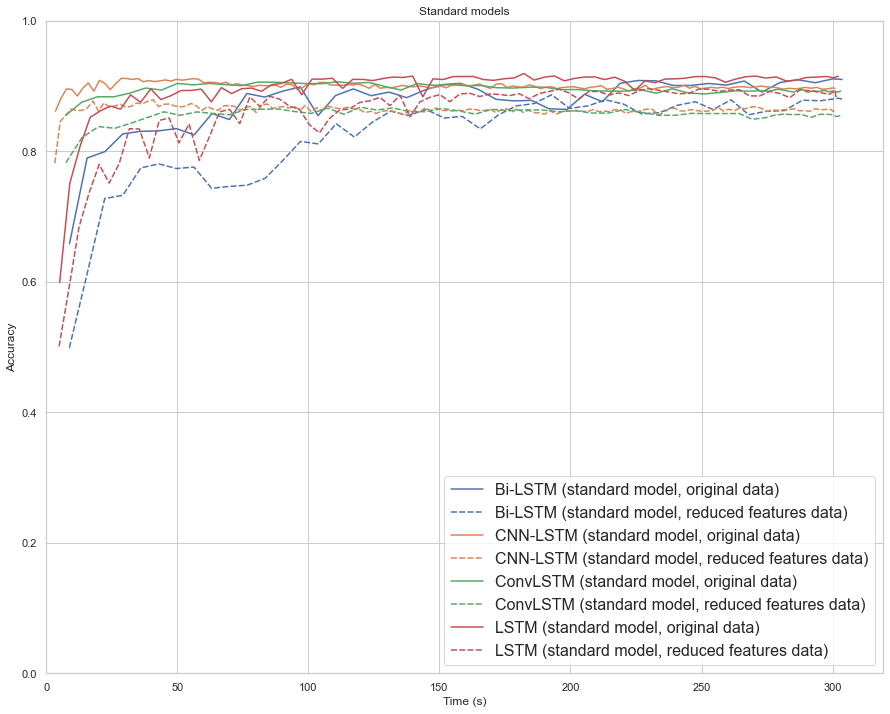

In [35]:
# plot all models trained on original data
labels = ['Bi-LSTM (standard model, original data)',
          'Bi-LSTM (standard model, reduced features data)',
          'CNN-LSTM (standard model, original data)',
          'CNN-LSTM (standard model, reduced features data)',
          'ConvLSTM (standard model, original data)',
          'ConvLSTM (standard model, reduced features data)',
          'LSTM (standard model, original data)',
          'LSTM (standard model, reduced features data)']
plot_mean_2('model_type', 'standard', style='data_used',types='two', labels=labels, title="Standard models")

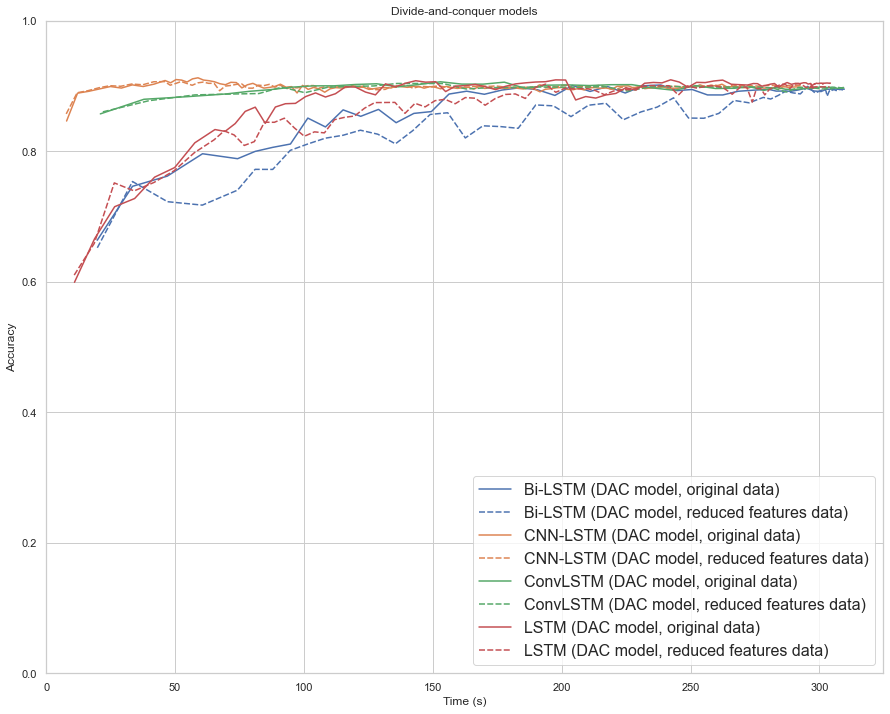

In [36]:
# plot all dac models trained on original data
labels = ['Bi-LSTM (DAC model, original data)',
          'Bi-LSTM (DAC model, reduced features data)',
          'CNN-LSTM (DAC model, original data)',
          'CNN-LSTM (DAC model, reduced features data)',
          'ConvLSTM (DAC model, original data)',
          'ConvLSTM (DAC model, reduced features data)',
          'LSTM (DAC model, original data)',
          'LSTM (DAC model, reduced features data)']
plot_mean_2('model_type', 'divide_and_conquer', style='data_used',types='two', labels = labels, title="Divide-and-conquer models" )

## Comaparing standard vs DAC models

In [37]:
# function to get t-tests comparing datasets
def t_tests_std_dac(p_values_dict):

    architectures = ['lstm', 'cnnlstm', 'convlstm', 'bilstm']

    # get t test results for each architecture
    results = dict()
    for architecture in architectures:
        results[architecture + '_original_data'] = t_test_pair(p_values_dict, architecture + '_standard_original', architecture + '_divide_and_conquer_original')
        results[architecture + '_fr_data'] = t_test_pair(p_values_dict, architecture + '_standard_reduced', architecture + '_divide_and_conquer_reduced')

    return results

In [38]:
repeat_epoch_accuracies_test_df

,epoch,model,accuracy,time,family,model_type,data_used,data_used_and_model_type,test_or_train,model_plain
0,0,lstm_original_1,0.553105,6.848221,lstm,standard,original,original_standard,test,lstm_standard_original
1,1,lstm_original_1,0.715304,10.509077,lstm,standard,original,original_standard,test,lstm_standard_original
2,2,lstm_original_1,0.808280,14.391985,lstm,standard,original,original_standard,test,lstm_standard_original
3,3,lstm_original_1,0.861215,18.274889,lstm,standard,original,original_standard,test,lstm_standard_original
4,4,lstm_original_1,0.879878,22.117772,lstm,standard,original,original_standard,test,lstm_standard_original
...,...,...,...,...,...,...,...,...,...,...
24475,148,bilstm_reduced__dac_10,NaN,NaN,bilstm,divide_and_conquer,reduced,reduced_divide_and_conquer,test,bilstm_divide_and_conquer_reduced
24476,149,bilstm_reduced__dac_10,NaN,NaN,bilstm,divide_and_conquer,reduced,reduced_divide_and_conquer,test,bilstm_divide_and_conquer_reduced
24477,150,bilstm_reduced__dac_10,NaN,NaN,bilstm,divide_and_conquer,reduced,reduced_divide_and_conquer,test,bilstm_divide_and_conquer_reduced
24478,151,bilstm_reduced__dac_10,NaN,NaN,bilstm,divide_and_conquer,reduced,reduced_divide_and_conquer,test,bilstm_divide_and_conquer_reduced


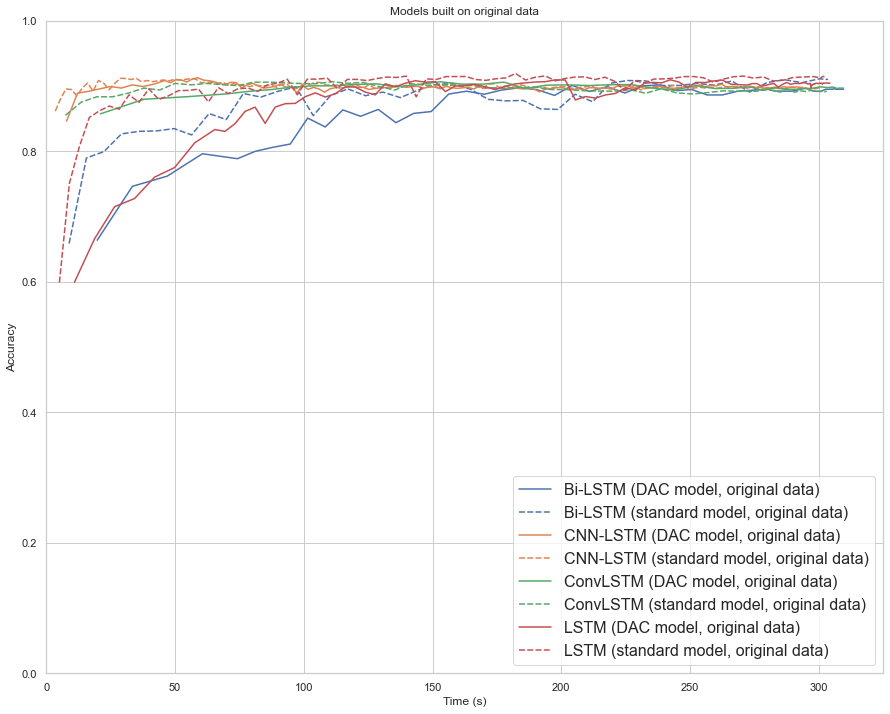

In [39]:
# plot all models trained on original data
labels = ['Bi-LSTM (DAC model, original data)',
          'Bi-LSTM (standard model, original data)',
          'CNN-LSTM (DAC model, original data)',
          'CNN-LSTM (standard model, original data)',
          'ConvLSTM (DAC model, original data)',
          'ConvLSTM (standard model, original data)',
          'LSTM (DAC model, original data)',
          'LSTM (standard model, original data)']
plot_mean_2('data_used', 'original', style='model_type',types='two', labels=labels, title="Models built on original data")

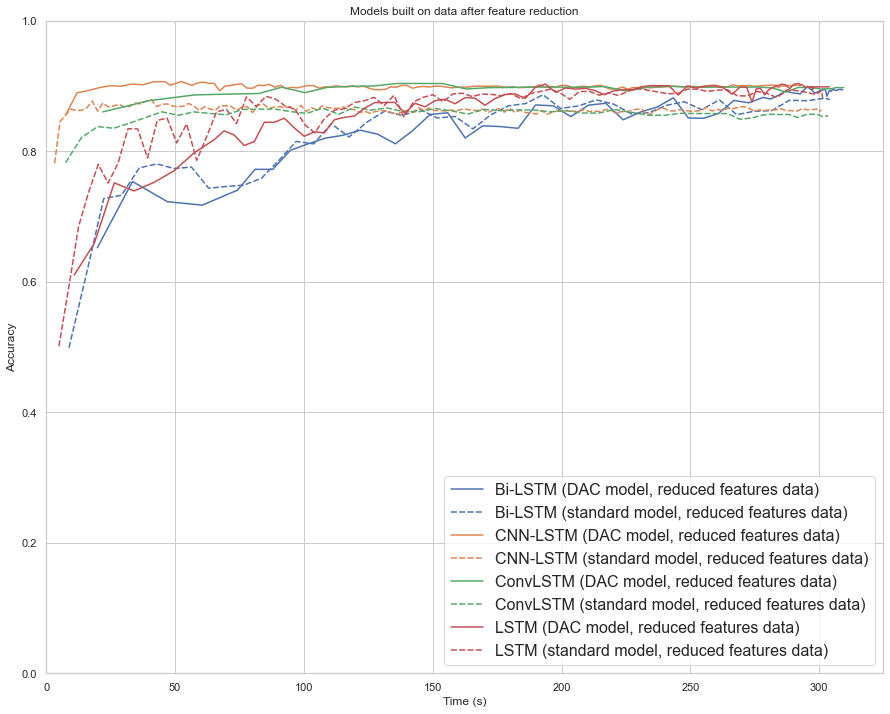

In [40]:
# plot all dac models trained on original data
labels = ['Bi-LSTM (DAC model, reduced features data)',
          'Bi-LSTM (standard model, reduced features data)',
          'CNN-LSTM (DAC model, reduced features data)',
          'CNN-LSTM (standard model, reduced features data)',
          'ConvLSTM (DAC model, reduced features data)',
          'ConvLSTM (standard model, reduced features data)',
          'LSTM (DAC model, reduced features data)',
          'LSTM (standard model, reduced features data)']
plot_mean_2('data_used', 'reduced', style='model_type',types='two', labels = labels, title="Models built on data after feature reduction" )

## Box plot of all models for discussion

In [41]:
x = []

for i in range(len(repeat_metrics_df)):
    if repeat_metrics_df['data_used'][i] == 'original':
        x.append('Original dataset')
    else:
        x.append('Dataset after feature selection')
        
repeat_metrics_df['data_used_pretty'] = x

In [42]:
x = []

for i in range(len(repeat_metrics_df)):
    if repeat_metrics_df['family'][i] == 'lstm':
        x.append('Vanilla LSTM')
    elif repeat_metrics_df['family'][i] == 'cnnlstm':
        x.append('CNN-LSTM')
    elif repeat_metrics_df['family'][i] == 'convlstm':
        x.append('ConvLSTM')
    else:
        x.append('Bi-directional LSTM')
        
repeat_metrics_df['architecture'] = x

In [43]:
# set figure size globally
sns.set(rc={'figure.figsize':(15,12)}, font_scale=1.5)
sns.set_style('whitegrid')

Facet grid of F1 Scores

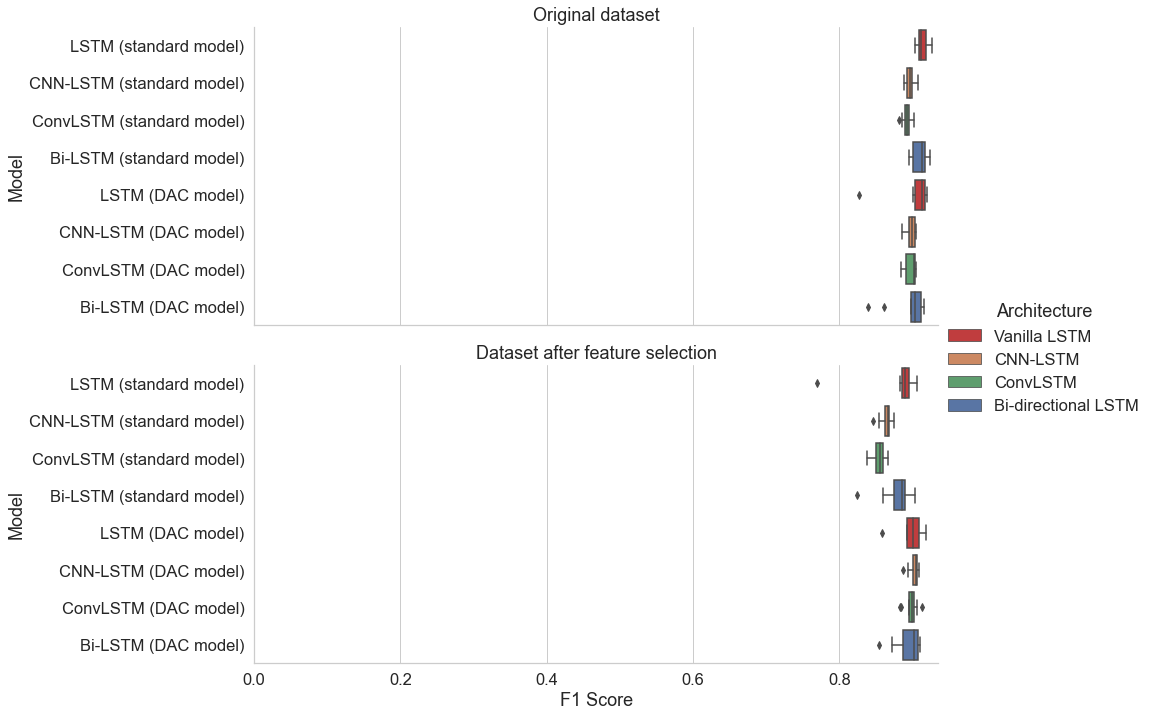

In [44]:
model_labels = ['LSTM (standard model)',
               'CNN-LSTM (standard model)',
               'ConvLSTM (standard model)',
               'Bi-LSTM (standard model)',
               'LSTM (DAC model)',
               'CNN-LSTM (DAC model)',
               'ConvLSTM (DAC model)',
               'Bi-LSTM (DAC model)']

colours ={'Bi-directional LSTM': "C0", "CNN-LSTM": "C1", "ConvLSTM": "C2", "Vanilla LSTM": "tab:red", "Total": "k"}

ax = sns.catplot(y='model_plain',
                 x='f1_score',
                 kind='box',
                 hue='architecture',
                 palette = colours,
                 row='data_used_pretty' ,
                 dodge =False,
                 sharey=False,
                 data=repeat_metrics_df,
                height=5,
                aspect=3)

ax.set_titles(template='{row_name}')

ax.set_xlabels('F1 Score')
ax.set_ylabels('Model')

ax.set(yticklabels=model_labels)

ax.set(xlim=(0, None))

ax.legend.set_title('Architecture')

ax.legend.set_label('Architecture')


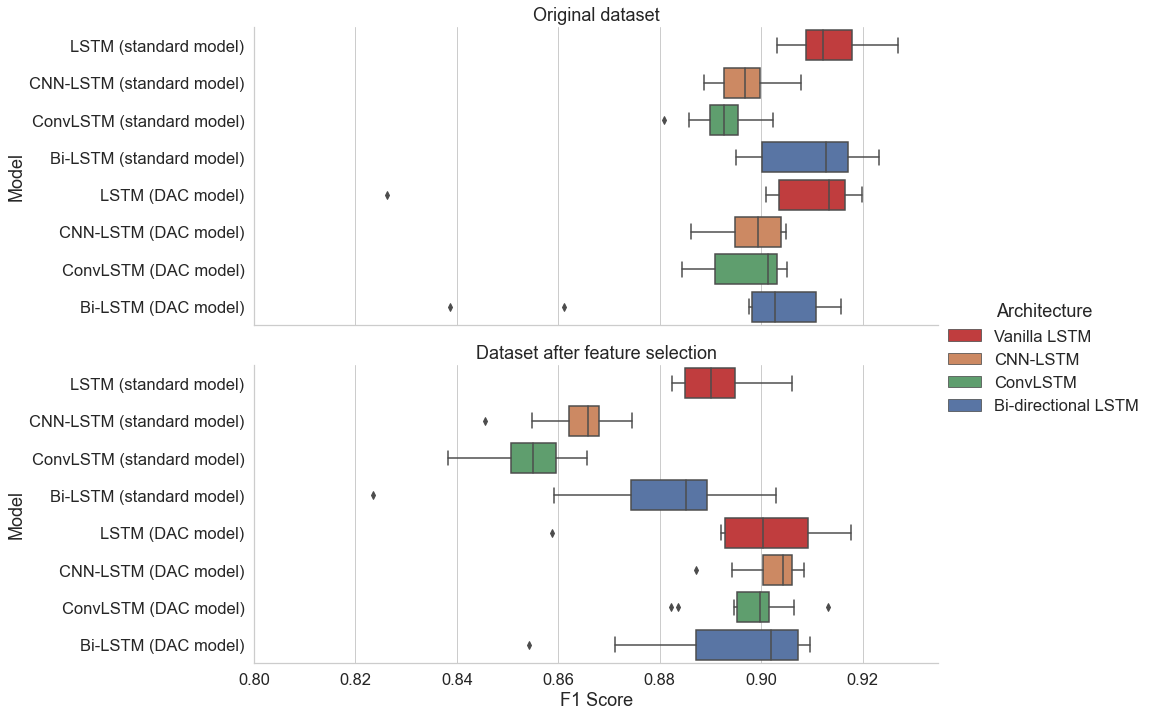

In [45]:
model_labels = ['LSTM (standard model)',
               'CNN-LSTM (standard model)',
               'ConvLSTM (standard model)',
               'Bi-LSTM (standard model)',
               'LSTM (DAC model)',
               'CNN-LSTM (DAC model)',
               'ConvLSTM (DAC model)',
               'Bi-LSTM (DAC model)']

colours ={'Bi-directional LSTM': "C0", "CNN-LSTM": "C1", "ConvLSTM": "C2", "Vanilla LSTM": "tab:red", "Total": "k"}

ax = sns.catplot(y='model_plain',
                 x='f1_score',
                 kind='box',
                 hue='architecture',
                 palette = colours,
                 row='data_used_pretty' ,
                 dodge =False,
                 sharey=False,
                 data=repeat_metrics_df,
                height=5,
                aspect=3)

ax.set_titles(template='{row_name}')

ax.set_xlabels('F1 Score')
ax.set_ylabels('Model')

ax.set(yticklabels=model_labels)

ax.set(xlim=(0.8, None))

ax.legend.set_title('Architecture')

ax.legend.set_label('Architecture')


Comparison of all reduced vs all original datasets

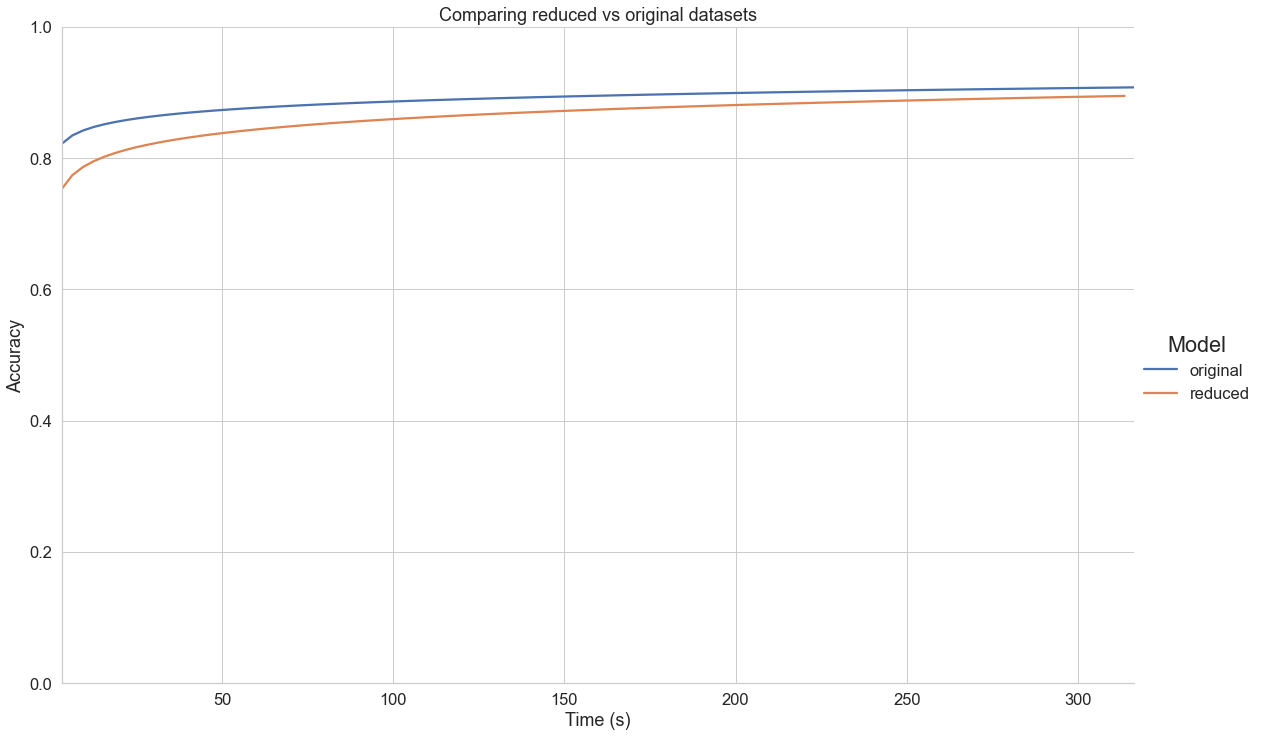

In [46]:
ax = sns.lmplot(x = 'time', 
                y = 'accuracy', 
                data=repeat_epoch_accuracies_test_df, 
                hue='data_used',
                logx=True,
                scatter=False,
                ci=None,
                truncate=True,
                height=10,
                aspect=1.6,
                scatter_kws={"s": 1}
               )


ax.set(title='Comparing reduced vs original datasets',
       xlabel='Time (s)',
       ylabel='Accuracy')

ax.legend.set_title('Model',prop={'size':'large'})

ax.set(ylim=(0, 1))

plt.show()


## Plotting best models

In [47]:
# make function to get the mean accuracy/training times of epochs for the data, depending on what is selected, and plot it
def plot_mean_3(col, condition, style, types=None, title=None, labels='default', df=repeat_epoch_accuracies_test_df):
    
    # make df of mean accuracy and time per epoch
    test_mean_accuracies_times = df[df[col].isin(condition)].fillna(method='ffill').groupby(['model_plain','epoch']).mean()
    test_mean_accuracies_times.reset_index(inplace=True)  
    
    # make column to show whether dac or standard
    test_mean_accuracies_times['model_type'] = model_type_fn(test_mean_accuracies_times)
    
    # make column to show data used
    test_mean_accuracies_times['data_used'] = data_used_fn(test_mean_accuracies_times)
    
    # add column to show model family
    test_mean_accuracies_times['family'] = model_family_fn(test_mean_accuracies_times) 

    # get names of the models to be plotted
    models_list=unique(test_mean_accuracies_times['model_plain'])
    
    # if no labels inputted, set the legend labels to default 
    if (labels=='default'):
        labels=None
        
    colours ={'bilstm': "C0", "cnnlstm": "C1", "convlstm": "C2", "lstm": "tab:red", "Total": "k"}
    
    # plot the lines for each model    
    ax = sns.lineplot(x = 'time', 
              y = 'accuracy', 
              data=test_mean_accuracies_times,
              style=style,
              hue='family',
              palette = colours,
              ci='sd',
            )
    
    # add legend. user can set custom labels for aesthetics
    ax.legend(loc = 'lower right',
             labels=labels,
             prop={'size': 16})
    
    # limit for consistency
    ax.set(ylim=(0, 1),
          xlim=(0, None))
    
    ax.set(title=title,
       xlabel='Time (s)',
       ylabel='Accuracy')
    
    print(test_mean_accuracies_times.model_type)
    

0      standard
1      standard
2      standard
3      standard
4      standard
         ...   
607    standard
608    standard
609    standard
610    standard
611    standard
Name: model_type, Length: 612, dtype: object


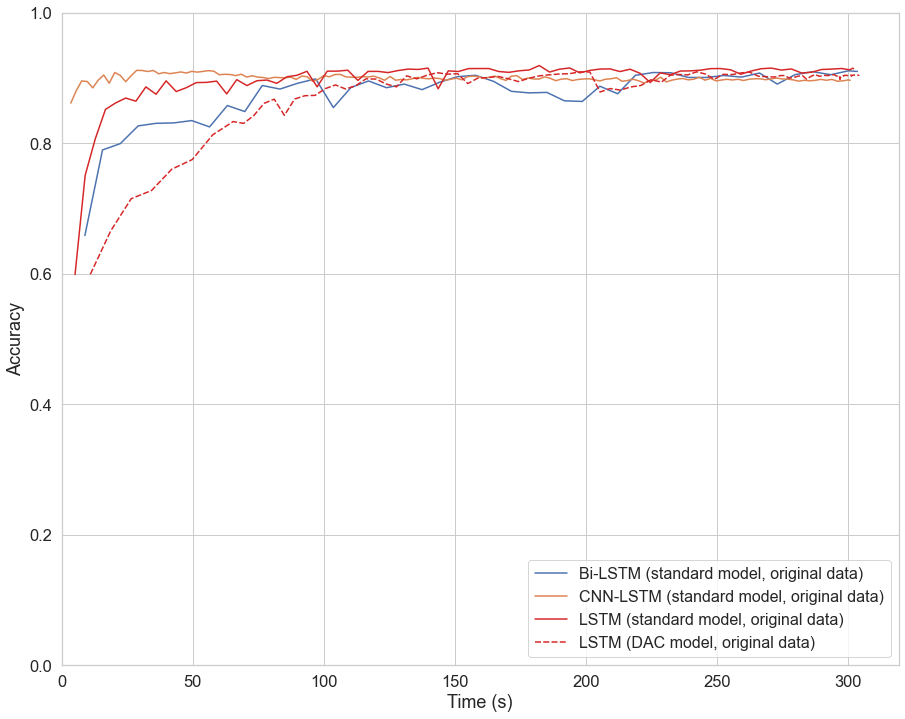

In [48]:
# make a list of the best perfroming models to plot
best_models_list = ['lstm_standard_original', 'bilstm_standard_original', 'lstm_divide_and_conquer_original', 'cnnlstm_standard_original']

labels = ['Bi-LSTM (standard model, original data)',
          'CNN-LSTM (standard model, original data)',
          'LSTM (standard model, original data)',
          'LSTM (DAC model, original data)'
         ]

plot_mean_3('model_plain', best_models_list, style='model_type', labels = labels)